Gestión columnas categóricas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime, timedelta

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df_cat_0 = pd.read_csv(r"C:\Users\Renée García Mathieu\Desktop\Proyecto_EDA_con_Python_CGG\Transformed_Data\Datos_Limpios_Bank", parse_dates=['Dt_Customer','date'])
df_cat_0.sample(3)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
3412,93599,1,2,2012-02-15,14,ba08d3f0-1cdc-4db1-94f2-b7838f507cca,40.0,admin.,married,university.degree,0.0,1.0,0.0,telephone,404.0,7.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,2017-10-31,35.534,-84.469
40306,112828,0,0,2014-08-14,5,6a4e7a57-efb3-41f6-ba0a-32c083870f6f,32.0,management,single,university.degree,0.0,0.0,0.0,cellular,221.0,4.0,16.0,1.0,success,-1.7,94.215,-40.3,0.896,4991.6,no,2019-01-09,47.256,-97.934
38559,97168,0,1,2014-12-19,16,6f1063d1-9633-42e9-8637-914c5b8057fd,69.0,retired,married,professional.course,0.0,0.0,1.0,cellular,103.0,1.0,999.0,1.0,failure,-3.4,92.431,-26.9,0.722,5017.5,no,2018-11-20,48.646,-104.582


In [6]:
df_cat = df_cat_0.copy()
df_cat.sample()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
4835,43365,2,2,2012-05-23,29,e27da751-9223-4923-b28c-3d9494b213d0,36.0,unemployed,single,basic.4y,NaN,1.0,0.0,telephone,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,2017-04-29,33.191,-90.076


In [7]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             43170 non-null  int64         
 1   Kidhome            43170 non-null  int64         
 2   Teenhome           43170 non-null  int64         
 3   Dt_Customer        43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth  43170 non-null  int64         
 5   ID                 43170 non-null  object        
 6   age                37880 non-null  float64       
 7   job                42655 non-null  object        
 8   marital            42915 non-null  object        
 9   education          41193 non-null  object        
 10  default            34019 non-null  float64       
 11  housing            41974 non-null  float64       
 12  loan               41974 non-null  float64       
 13  contact            43000 non-null  object        
 14  durati

In [8]:
col_categoricas = df_cat.select_dtypes(include="object").columns
col_categoricas

Index(['ID', 'job', 'marital', 'education', 'contact', 'poutcome', 'y'], dtype='object')

In [10]:
def analisis_general_cat(df): 
    col_cat = df.select_dtypes(include="object").columns

    if len(col_cat) == 0:
        print("No hay columnas categóricas")

    else:
        for col in col_cat:
            print(f"La distribución de la columna {col.upper()}")
            print(f"Esta columna tiene {len(df[col].unique())} valores únicos")
            display(df[col].value_counts(normalize=True))
            print("_______________\n Describe")
            display(df[col].describe())
            print("----------------")

    return col_cat

In [11]:
analisis_general_cat(df_cat)

La distribución de la columna ID
Esta columna tiene 43170 valores únicos


ID
9727bc06-c11a-461a-a5bb-3d210467cc2a    0.000023
089b39d8-e4d0-461b-87d4-814d71e0e079    0.000023
5006b75e-18bb-46e9-ae1a-89f7eb79cc8a    0.000023
e554d2ad-6c83-4603-93d4-fc596b807eff    0.000023
3959015a-9713-4877-9a43-740e34c29eaf    0.000023
                                          ...   
5e3483e5-236d-437d-8351-541f9d09b9dd    0.000023
d63ede72-0b6d-45b1-8872-385ac6897f65    0.000023
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    0.000023
9991fafb-4447-451a-8be2-b0df6098d13e    0.000023
3f9f49b5-e410-4948-bf6e-f9244f04918b    0.000023
Name: proportion, Length: 43170, dtype: float64

_______________
 Describe


count                                    43170
unique                                   43170
top       9727bc06-c11a-461a-a5bb-3d210467cc2a
freq                                         1
Name: ID, dtype: object

----------------
La distribución de la columna JOB
Esta columna tiene 12 valores únicos


job
admin.           0.254906
blue-collar      0.226328
technician       0.164717
services         0.097574
management       0.071504
retired          0.041965
entrepreneur     0.035682
self-employed    0.034908
housemaid        0.026328
unemployed       0.024921
student          0.021170
Name: proportion, dtype: float64

_______________
 Describe


count      42655
unique        11
top       admin.
freq       10873
Name: job, dtype: object

----------------
La distribución de la columna MARITAL
Esta columna tiene 4 valores únicos


marital
married     0.605825
single      0.282069
divorced    0.112105
Name: proportion, dtype: float64

_______________
 Describe


count       42915
unique          3
top       married
freq        25999
Name: marital, dtype: object

----------------
La distribución de la columna EDUCATION
Esta columna tiene 8 valores únicos


education
university.degree      0.308839
high.school            0.240939
basic.9y               0.153157
professional.course    0.132959
basic.4y               0.105746
basic.6y               0.057922
illiterate             0.000437
Name: proportion, dtype: float64

_______________
 Describe


count                 41193
unique                    7
top       university.degree
freq                  12722
Name: education, dtype: object

----------------
La distribución de la columna CONTACT
Esta columna tiene 3 valores únicos


contact
cellular     0.637116
telephone    0.362884
Name: proportion, dtype: float64

_______________
 Describe


count        43000
unique           2
top       cellular
freq         27396
Name: contact, dtype: object

----------------
La distribución de la columna POUTCOME
Esta columna tiene 4 valores únicos


poutcome
nonexistent    0.862860
failure        0.103744
success        0.033395
Name: proportion, dtype: float64

_______________
 Describe


count           43000
unique              3
top       nonexistent
freq            37103
Name: poutcome, dtype: object

----------------
La distribución de la columna Y
Esta columna tiene 3 valores únicos


y
no     0.887349
yes    0.112651
Name: proportion, dtype: float64

_______________
 Describe


count     43000
unique        2
top          no
freq      38156
Name: y, dtype: object

----------------


Index(['ID', 'job', 'marital', 'education', 'contact', 'poutcome', 'y'], dtype='object')

In [14]:
def subplot_col_cat(df, max_unique=100, top_n=20):
    categorical_col = df.select_dtypes(include=["object", "category"]).columns

    if len(categorical_col) == 0:
        print("No hay columnas categóricas en el DF")
        return
    
    categorical_col = [col for col in categorical_col if df[col].unique() <= max_unique]

    num_cols = len(categorical_col)
    rows = (num_cols + 2) // 3
    fig, axes = plt.subplots(rows,3, figsize=(15, rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_col):
        top_categories = df[col].value_counts().nlargest(top_n).index
        filtered_data = df[df[col].isin(top_categories)]
        sns.countplot(data=df, x= col, ax=axes[i], hue=col, palette="tab10", legend=False, order=top_categories)
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis="x", rotation = 90)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [16]:
col_cat_grap = ['job', 'marital', 'education', 'contact', 'poutcome', 'y']

Distribución de la columna job


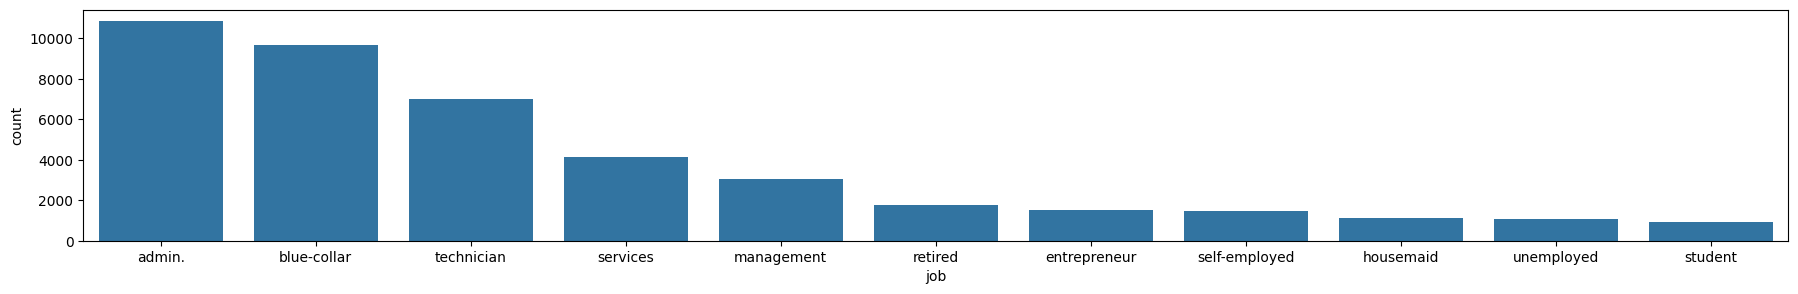

Distribución de la columna marital


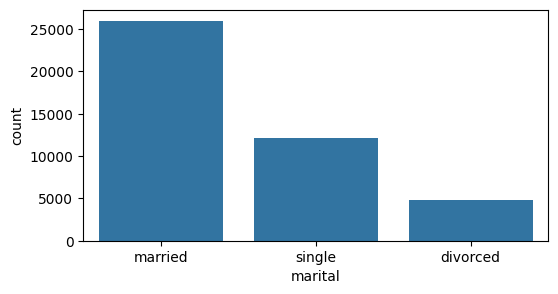

Distribución de la columna education


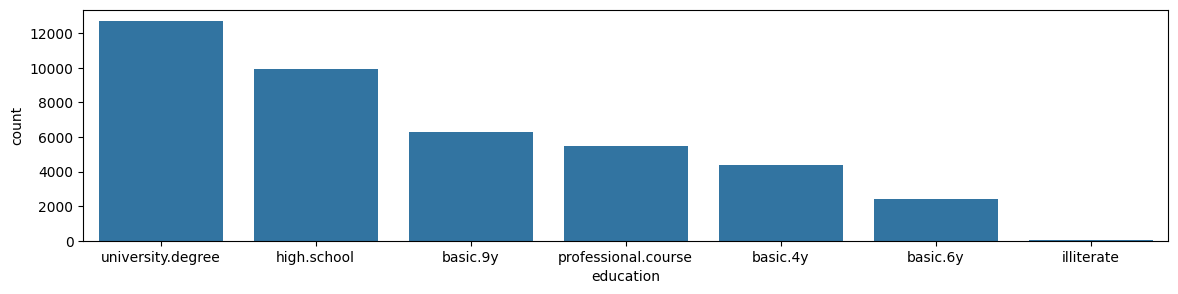

Distribución de la columna contact


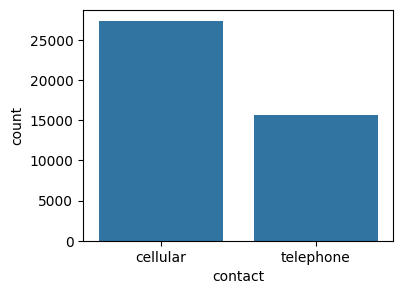

Distribución de la columna poutcome


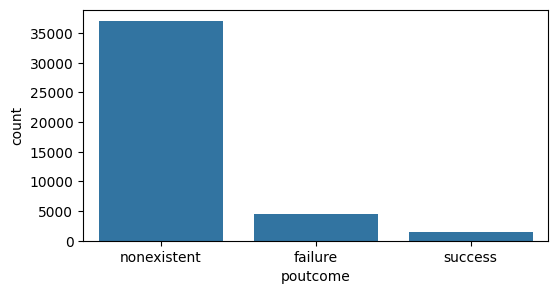

Distribución de la columna y


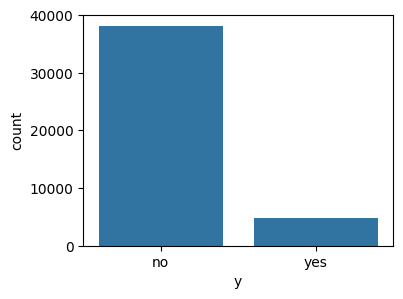

In [18]:
for col in col_cat_grap:
    print(f"Distribución de la columna {col}")
    plt.figure(figsize=(df_cat[col].nunique() * 2, 3))
    sns.countplot(x=df_cat[col], order=df_cat[col].value_counts().index)
    plt.show()

In [20]:
categorical_col = df_cat.select_dtypes(include=["object", "category"]).columns

for col in categorical_col:
    print(f"\nColumna:{col}")
    print(df_cat[col].unique())


Columna:ID
['089b39d8-e4d0-461b-87d4-814d71e0e079'
 'e9d37224-cb6f-4942-98d7-46672963d097'
 '3f9f49b5-e410-4948-bf6e-f9244f04918b' ...
 'd6271666-319d-42c8-a741-cb22bf2c2093'
 'f67fbfa8-6573-414d-a805-b26a2f1b1ceb'
 '9727bc06-c11a-461a-a5bb-3d210467cc2a']

Columna:job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']

Columna:marital
['married' 'single' 'divorced' nan]

Columna:education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']

Columna:contact
['telephone' nan 'cellular']

Columna:poutcome
['nonexistent' nan 'failure' 'success']

Columna:y
['no' 'yes' nan]


In [21]:
categorical_col = df_cat.select_dtypes(include=["object", "category"]).columns

nulos_cat = df_cat[categorical_col].isnull().sum().to_frame(name="Nulos")
nulos_cat["%Nulos"] = nulos_cat["Nulos"] /len(df_cat) *100

nulos_cat = nulos_cat[nulos_cat["Nulos"] > 0]

nulos_cat = nulos_cat.sort_values("%Nulos", ascending=False)

print(nulos_cat)

           Nulos    %Nulos
education   1977  4.579569
job          515  1.192958
marital      255  0.590688
contact      170  0.393792
poutcome     170  0.393792
y            170  0.393792


In [22]:
df_cat[categorical_col] = df_cat[categorical_col].fillna("unknown")

In [23]:
categorical_col = df_cat.select_dtypes(include=["object", "category"]).columns

nulos_cat = df_cat[categorical_col].isnull().sum().to_frame(name="Nulos")
nulos_cat["%Nulos"] = nulos_cat["Nulos"] /len(df_cat) *100

nulos_cat = nulos_cat[nulos_cat["Nulos"] > 0]

nulos_cat = nulos_cat.sort_values("%Nulos", ascending=False)

print(nulos_cat)

Empty DataFrame
Columns: [Nulos, %Nulos]
Index: []


In [25]:
df_cat.to_csv(r"C:\Users\Renée García Mathieu\Desktop\Proyecto_EDA_con_Python_CGG\Transformed_Data\Datos_Cat_Limpios_Bank", index=False)